In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [202]:
df = pd.read_csv("email_spam.csv")

In [203]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [204]:
df['spam'] = df.Category.apply(lambda x: 1 if x=='ham' else 0)

In [205]:
df.rename({'spam':'Spam'},axis = 1,inplace = True)
df

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0
5568,ham,Will ü b going to esplanade fr home?,1
5569,ham,"Pity, * was in mood for that. So...any other s...",1
5570,ham,The guy did some bitching but I acted like i'd...,1


In [287]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [207]:
cv = CountVectorizer()

In [208]:
# df['Message'] = cv.fit_transform(df['Message'])

In [209]:
df['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [267]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'].values,df['Spam'],test_size=0.2)

In [268]:
X_train_count = cv.fit_transform(X_train).toarray()

In [288]:
model = MultinomialNB()

In [289]:
model.fit(X_train_count,y_train)

MultinomialNB()

In [290]:
model.predict(cv.transform(X_test).toarray()[4:5])

array([1], dtype=int64)

In [291]:
model.score(cv.transform(X_test).toarray(),y_test)

0.9820627802690582

In [275]:
X_test[4:5]

array(['Are you still getting the goods.'], dtype=object)

In [276]:
y_test

4349    1
5348    1
4634    1
1902    1
2561    1
       ..
944     1
5261    1
4075    1
2133    0
1490    1
Name: Spam, Length: 1115, dtype: int64

In [277]:
from sklearn.metrics import confusion_matrix

In [278]:
cm = confusion_matrix(model.predict(cv.transform(X_test).toarray()),y_test)

In [279]:
import seaborn as sns

<AxesSubplot:>

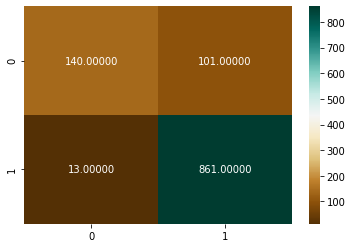

In [280]:
sns.heatmap(cm,annot=True,fmt='.5f',cmap='BrBG')